## Classificação de imagens com Transfer Learning.##
## Recursos usados: ##
## Google Colaboratory para processamento em nuvem. ##
## Conjunto de dados disponível em Kaggle. ##

In [ ]:
#Importando o sistema operacional e o método random.
import os,random

### Verificando as pastas no diretório "drive/My Drive/datasetes"


In [ ]:
print(os.listdir("drive/My Drive/datasets"))

['train', '.ipynb_checkpoints', 'test']


In [ ]:
# Mostrando o nome de cinco imagens do arquivo train.
print(os.listdir("drive/My Drive/datasets/train")[:5])

['dog.199.jpg', 'dog.198.jpg', 'dog.196.jpg', 'dog.197.jpg', 'dog.194.jpg']


### Imagens
### Definindo as variáveis train_dir e test_dir para receber os diretórios dos arquivos train e test

In [ ]:
train_dir = 'drive/My Drive/datasets/train'
test_dir = 'drive/My Drive/datasets/test'

### Criar a lista train_imgs para armazenar conteúdo da variável train_dir

### Criar a lista test_imgs para armazenar o conteúdo da variável test_dir

In [ ]:
train_imgs = ['drive/My Drive/datasets/train/{}'.format(i) for i in os.listdir(train_dir)]
test_imgs = ['drive/My Drive/datasets/test/{}'.format(i) for i in os.listdir(test_dir)]

In [ ]:
# Mostrando a quantidade de imagens das pastas train e test
print("Quantidade de imagens de treino:{train} e test:{test}".format(train=len(train_imgs),test=len(test_imgs)))

Quantidade de imagens de treino:400 e test:100


### Sorteando as imagens para o treinamento. 

In [ ]:
random.shuffle(train_imgs)

In [ ]:
# Exibindo o nome de 10 imagens do arquivo train_imgs
print(train_imgs[:10])

['drive/My Drive/datasets/train/dog.66.jpg', 'drive/My Drive/datasets/train/dog.152.jpg', 'drive/My Drive/datasets/train/dog.36.jpg', 'drive/My Drive/datasets/train/dog.89.jpg', 'drive/My Drive/datasets/train/cat.93.jpg', 'drive/My Drive/datasets/train/dog.159.jpg', 'drive/My Drive/datasets/train/cat.146.jpg', 'drive/My Drive/datasets/train/cat.64.jpg', 'drive/My Drive/datasets/train/dog.121.jpg', 'drive/My Drive/datasets/train/cat.43.jpg']


### importando as bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Definindo as dimensões das imagens.

In [ ]:
nrows = 150
ncolumns = 150
channels = 3

### Função para processamento das imagens e classes.

### Redimensionando as imagens e definindo os valores (1 e 0) para as classes (Dog e Cat)

In [ ]:
def read_and_process_image(list_of_images):  
    X = []
    y = []
    
    for image in list_of_images:
        image_ = Image.open(image)
        X.append(np.asarray(image_.resize((nrows,ncolumns))))
        
        if 'dog' in image: #Classifica com o número 1.
            y.append(1)
        elif 'cat' in image: #Classifica com o número 0.
            y.append(0)
    
    return X, y

In [ ]:
# Executando a função read and process image.
X, y = read_and_process_image(train_imgs)

### Transformando a lista de imagens e classes em matriz.

In [ ]:
X = np.array(X)
y = np.array(y)

### Mostrando algumas imagens.

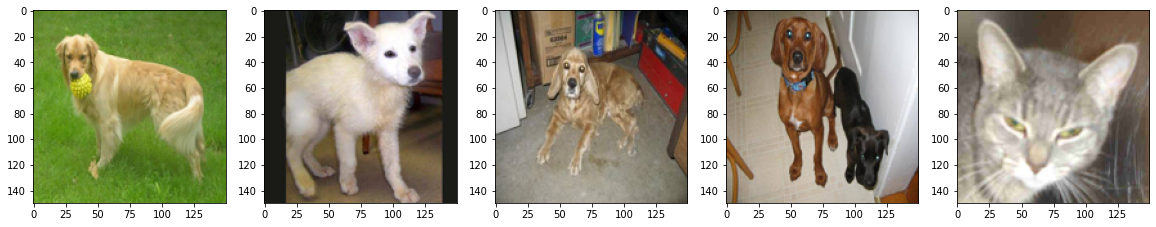

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

### Separando as imagens para treino e teste-(80% para treino e 20% para teste)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

### instalando as bibliotecas keras e tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

### Importando InceptionResNetV2 com o modelo pre-treinado ImageNet.

In [ ]:
from keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))

Using TensorFlow backend.


219062272/219055592 [==============================] - 14s 0us/step


### Verificando a arquitetura da rede conv_base.

In [ ]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

#### Importando layers e models da biblioteca keras.

In [ ]:
from keras import layers
from keras import models

### Utilizando a rede convolucional como base para o modelo.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Verificando novamente a arquitetura da rede

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


### Número de pesos ajustáveis com e sem a rede pré-treinada.

In [ ]:
print('Número de pesos ajustáveis sem utilizar a rede convolucional:', len(model.trainable_weights))
conv_base.trainable = False
print('Número de pesos ajustáveis utilizando a rede convolucional::', len(model.trainable_weights))

Número de pesos ajustáveis sem utilizar a rede convolucional: 492
Número de pesos ajustáveis utilizando a rede convolucional:: 4


#### Utilizando técnicas de processamento de imagem nos conjuntos treino e teste para previnir overfitting e underfitting. 
#### O modelo overfitting ocorre quando o modelo se adaptou muito bem aos dados com os quais está sendo treinado; porém, não generaliza bem para novos dados.
#### O modelo underfitting ocorre quando o modelo não se adaptou bem com os dados com os quais foi treinado.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

ntrain = len(X_train)
nval = len(X_val)
batch_size = 32

train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

### Modelo binário para treinar as nossas imagens.

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/20
10/10 [==============================] - 50s 5s/step - loss: 0.7172 - acc: 0.5562 - val_loss: 0.0882 - val_acc: 0.9531
Epoch 2/20
10/10 [==============================] - 37s 4s/step - loss: 0.6103 - acc: 0.6250 - val_loss: 0.1074 - val_acc: 0.9167
Epoch 3/20
10/10 [==============================] - 37s 4s/step - loss: 0.5422 - acc: 0.6875 - val_loss: 0.1191 - val_acc: 0.9792
Epoch 4/20
10/10 [==============================] - 39s 4s/step - loss: 0.4929 - acc: 0.7500 - val_loss: 0.0260 - val_acc: 0.9688
Epoch 5/20
10/10 [==============================] - 37s 4s/step - loss: 0.4420 - acc: 0.7844 - val_loss: 0.1037 - val_acc: 0.9792
Epoch 6/20
10/10 [==============================] - 37s 4s/step - loss: 0.4533 - acc: 0.7344 - val_loss: 0.0283 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 38s 4s/step - loss: 0.4724 - acc: 0.7531 - val_loss: 0.0284 - val_acc: 0.9688
Epoch 8/20
10/10 [==============================] - 37s 4s/step - loss: 0.4205 - acc: 0.79

#### Salvando o modelo e pesos em disco

In [ ]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

#### Salvando o arquivo de histórico em disco.

In [ ]:
# Modulo pickel para escrever no arquivo "history.pckl"
import pickle

In [ ]:
f = open('history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

### Carregando o modelo a partir do disco.

In [ ]:
from keras.models import load_model

In [ ]:
import pickle

In [ ]:
model = load_model("model_keras.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### Carregando o arquivo de histórico a partir do disco.

In [ ]:
# Abrir o arquivo "history.pckl" no modo leitura.
f = open('history.pckl', 'rb')
historico = pickle.load(f)
f.close()

### Visualizando as métricas do modelo.

In [ ]:
import matplotlib.pyplot as plt

acc = historico['acc']
val_acc = historico['val_acc']
loss = historico['loss']
val_loss = historico['val_loss']
epochs = range(1, len(acc) + 1)

### Acurácia de treino e teste

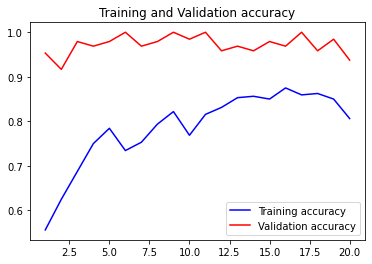

In [ ]:
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

### Função de perda de treino e teste.

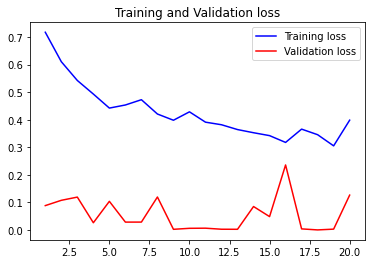

In [ ]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Função para suavizar os dados e melhorar a visualização.

In [ ]:
def smooth_plot(points, factor=0.7):
    smooth_pts = []
    for point in points:
        if smooth_pts:
            previous = smooth_pts[-1]
            smooth_pts.append(previous * factor + point * (1 - factor))
        else:
            smooth_pts.append(point)
    return smooth_pts

### Acurácia de treino e teste com os dados suavizados.

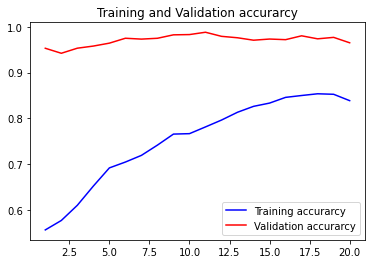

In [ ]:
plt.plot(epochs, smooth_plot(acc), 'b', label='Training accurarcy')
plt.plot(epochs, smooth_plot(val_acc), 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()

### Verificando as previsões e classificações no conjunto de dados teste.

### Processando 10 imagens a partir do conjunto  test_imgs para salvar nas variáveis x_test e y_test.

In [ ]:
X_test, y_test = read_and_process_image(test_imgs[0:10])

### Transformando a lista de imagens em matriz e aplicando a reescala dos pixels

In [ ]:
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

### Exibindo as imagens e suas respectivas classes.

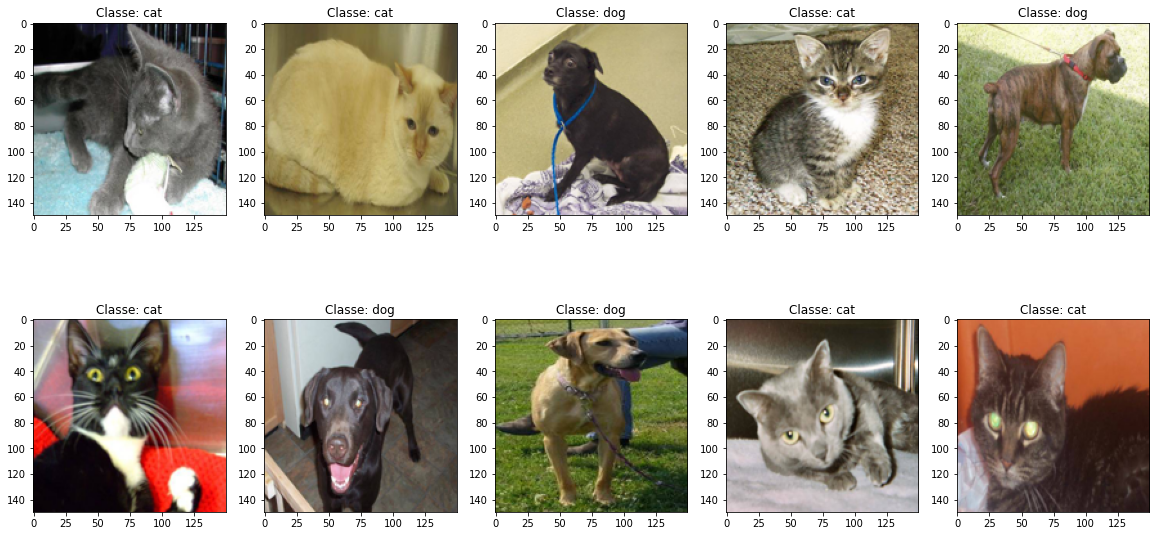

In [ ]:
i = 0
columns = 5
text_labels = []

plt.figure(figsize=(20,10))

for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict_classes(batch)
    if pred == 1: #Clasiifica como Dog.
        text_labels.append('dog')
    else:
        text_labels.append('cat') #Classifica como Cat.
    
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('Classe: ' + text_labels[i])
    
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

### Objetivo: Conhecer as redes neurais, as bibliotecas e os métodos para avaliar a aplicação da tecnologia nos processos, produtos e serviços.